In [2]:
import pandas as pd
import numpy as np
import regex as re

In [5]:
#Importo el documento limpiado 
df = pd.read_csv("input/sharkattack_clean.csv", encoding = 'latin-1')
df

,Unnamed: 0,Country,Activity,Year
0,2,USA,Surfing,2018
1,12,USA,Swimming,2018
2,53,USA,Surfing,2017
3,54,USA,Surfing,2017
4,61,USA,Surfing,2017
...,...,...,...,...
813,6151,USA,Swimming,1751
814,6187,USA,Swimming,2009
815,6201,USA,Surfing,1994
816,6288,USA,Swimming,1916


In [6]:
df.Year \
            .value_counts() \
            .reset_index() \
            .sort_values('index', ascending=False) \
            .reset_index(drop=False) \
            .set_index('index')["Year"]

index
2018     2
2017    36
2016    27
2015    27
2014    29
        ..
1817     1
1816     1
1780     1
1779     1
1751     1
Name: Year, Length: 118, dtype: int64

In [7]:
df["Siglo"] = pd.cut(df.Year,4,labels=range(1700,2100,100))

df

,Unnamed: 0,Country,Activity,Year,Siglo
0,2,USA,Surfing,2018,2000
1,12,USA,Swimming,2018,2000
2,53,USA,Surfing,2017,2000
3,54,USA,Surfing,2017,2000
4,61,USA,Surfing,2017,2000
...,...,...,...,...,...
813,6151,USA,Swimming,1751,1700
814,6187,USA,Swimming,2009,2000
815,6201,USA,Surfing,1994,2000
816,6288,USA,Swimming,1916,1900


In [8]:
pd.cut(df.Year,4,labels=range(1700,2100,100)).value_counts()

2000    740
1900     57
1800     16
1700      5
Name: Year, dtype: int64

In [19]:
df["Siglo"] = df.str.replace(r"2020","XXI")

AttributeError: 'DataFrame' object has no attribute 'str'

AttributeError: Can only use .str accessor with string values!

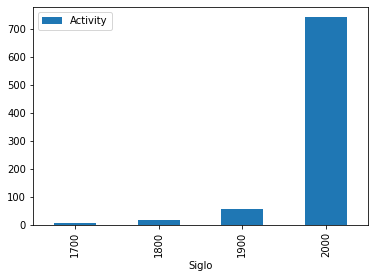

In [74]:
%matplotlib inline
df.groupby("Siglo").agg({"Activity":"count"}).plot.bar()

In [75]:
df.Activity.value_counts()

Surfing     522
Swimming    296
Name: Activity, dtype: int64

In [84]:
%matplotlib inline
df.groupby(["Siglo","Activity"]).agg({"Activity":"count"})

Activity
Siglo Activity          
1700  Surfing          1
      Swimming         4
1800  Surfing          1
      Swimming        15
1900  Surfing          0
      Swimming        57
2000  Surfing        520
      Swimming       220

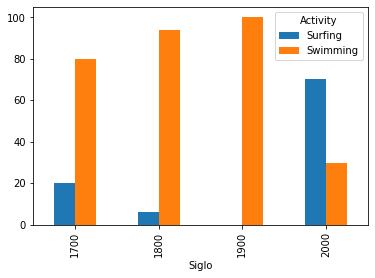

In [10]:
df.groupby(["Siglo","Activity"]).size().groupby(level=0).apply(
    lambda x:100 * x /x.sum()
).unstack().plot(kind ='bar',stacked= False)

    
